In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


In [2]:
def sort_df(df_: pd.DataFrame):
    df_ = df_.unstack()
    keys_0 = df_.columns
    df_ = df_[keys_0]
    keys_1 = df_.index
    df_ = df_.sort_values(by=keys_0[-1], axis=0, ascending=False)
    df_ = df_.sort_values(by=keys_1[-1], axis=1, ascending=True)
    return df_

In [3]:
def show_average_metric_df(average_metrics: pd.DataFrame, x_label, y_label, metric):

    fig = plt.figure(figsize=(11,11))
    ax = fig.add_subplot(111, projection='3d')
    
    xpos = np.arange(average_metrics.shape[0])
    ypos = np.arange(average_metrics.shape[1])
    
    xpos, ypos = np.meshgrid(xpos, ypos, indexing="ij")
    
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    
    dx = dy = 1
    dz = average_metrics.values.ravel()
    
    # scale the bars
    dz = (dz - dz.min())
    
    m = cm.ScalarMappable(cmap=cm.coolwarm)
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, color=m.to_rgba(dz))
    
    # ax.set_xlabel(x_label)
    # ax.set_ylabel(y_label)
    ax.set_zlabel(metric)
    
    # write the value of the bar on top of it
    for i in range(len(xpos)):
        ax.text(xpos[i], ypos[i], dz[i], '%.2f' % dz[i], color='black', fontsize=8)
    
    plt.xticks(np.arange(average_metrics.shape[0]), average_metrics.index)
    plt.yticks(np.arange(average_metrics.shape[1]), average_metrics.columns)
    
    plt.title(f'Average {metric} for different {x_label}s and {y_label}s')
    
    plt.show()
    

In [4]:
def get_plot_df(df: pd.DataFrame, x_label, y_label, metric):
    plot_df = df[[x_label, y_label, metric]].groupby([x_label, y_label]).mean()[metric]
    plot_df = sort_df(plot_df)
    show_average_metric_df(plot_df, x_label, y_label, metric)

In [5]:
chunkers = ["SentChunker_2_0.5", "SentChunker_3_0.5", "SentChunker_4_0.5"]
rankers = ["TfidfRanker_5", "CrossEncodingRanker_5", "GuessSimilarityRanker_5", "HybridRanker_5_TfidfRanker_5_CrossEncodingRanker_5_0.5", "RandomRanker_5", "PromptRanker_5"]
qas = ["mistralqa", "llamaqa", "gemmaqa", "gptqa"]
documents = ["newsqa", "qasper"]

In [6]:
wrong_questions = [
 'How large is the FEVER dataset?',
 'Do they use skip-gram word2vec?',
 'what are the human evaluation metrics?',
 'What platform do the crowd-sourced workers come from?',
 'what datasets have been used for this task?',
 'Are constructed datasets open sourced?',
 'In what way does each classifier evaluate one of the syntactic or social properties which are salient for a tweet?',
 'Who is Mitt Romney ?',
 "What was created as a show of Russia 's military might ?",
 'How long should women wait to have sex ?',
 'Do the authors report only on English',
 'Is Henry VIII reflective of Shakespeare in general?',
 'Is their gating mechanism specially designed to handle one sentence bags?',
 'What do the mines leave the surface prone to ?',
 'what other representations do they compare with?',
 'What spokesman said about Jackson ` s death ?',
 'Are the stories in the dataset fictional stories?',
 'By how much do they outperform translating without contextual information?',
 'Who sought treatment earlier this year ?',
 'Where is Hotel Diderot ?',
 'Do they evaluate by how much does ASR improve compared to state-of-the-art just by using their FST?',
 'What baseline is used for this task?',
 'what is the state of the art in English?',
 'when are more deaths reported in Syria ?',
 'How exactly do they weigh between different statistical models?',
 'Who has a PR problem ?',
 'What happened to Wood in 1981 ?',
 'What did the Facebook executive recognize ?',
 'How is cyberbullying defined?',
 'What does the document say to debate ?',
 'What did she say writing the biography helped her do ?',
 'What is the reason this research was not adopted in the 1960s?',
 "when Men use terms like `` gold digger '' and `` nagging '' ?",
 'What does author Patricia Cornwell talk about ?',
 'who applauds Obama for having courage to speak his mind ?',
 'What unusual building can be found near Lisbon ?',
 'Who is involved ?',
 'What does the firm say ?',
 'what insist the goverment',
 'What vocabulary size was the best performer?',
 'what is Auberge du Centre in Chitenay ?',
 'How old was James when he started working the cotton fields ?',
 'Where is the Duoro River ?',
 'what dataset did they use?',
 'When did language technology start in Iceland?',
 'Other than privacy, what are the other major ethical challenges in clinical data?',
 'What were the most salient features extracted by the models?',
 'What is the court case that could impact U.S. elections ?',
 'With how many languages do they experiment in the multilingual setup?',
 "What about the Earth 's surface ?",
 'What showed to be the best performing combination of semantic and statistical model on the summarization task in terms of ROUGE score?',
 "What will depart from Earth 's surface ?",
 'What does Windows compete with ?',
 'what manual evaluation is presented?',
 'What does Piccard want to demonstrate ?',
 'What are the steps in the MagiCoder algorithm?',
 'In what was does an LSTM mimic the prefrontal cortex?',
 'What is needed in outer space ?',
 'Which pairs of languages do they consider similar enough to capture phonetic structure?',
 "What does mark end of Wichita 's reputation ?",
 'In the books by Partricia Cornwall what is the name of her main character',
 'What translation models are explored?',
 'What supervised baselines did they compare with?',
 'Which dataset do they evaluate on for headline generation?',
 'What does the government program do for people ?',
 'what could be the major blow',
 'What helps young people prepare for green-collat jobs ?',
 'Which model architecture do they opt for?',
 'What is their baseline?',
 'What are the performances of LSTMs and humans on the task?',
 'What did Bertrand Piccard do ?',
 'What does Steve Harvey say about texting ?',
 'What morphological typologies are considered?',
 'What is the opinion of rescuer ?',
 'What contribute to improve the accuracy on legal question answering task?',
 'What datasets is the model evaluated on?',
 'Why is improvement on OntoNotes significantly smaller compared to improvement on WNUT 2017?',
 'What aspects are considered?',
 'Does Angelou believe politicians should raise the level of discussion ?',
 'What does the governement program pay people to do ?',
 "What do some say marks the end of Wichita 's rep as `` abortion capital '' ?",
 'What are colleagues talking about ?',
 'What can you read to stay up to date with the latest in Haiti ?',
 'Who has special coverage of the latest developments ?',
 'Who are considered trained experts?',
 'How does hard debiasing affect gender bias in prediction and performance?',
 'Who is President Ahmadinejad popular with ?',
 'How does labeling scheme look like?',
 'what does the gov do to train',
 'How does the paper use language model for context aware search?',
 'What can students do ?',
 'What is the model trained?',
 'What might raise a red flag ?',
 'In what way might a possible recession be fought ?',
 'How do they use extracted intent to rescore?',
 'How are labels for trolls obtained?',
 'Which languages do they use?',
 'how was the experiment evaluated?',
 "How do the editors' annotations differ from those in existing datasets?",
 'In what way does an LSTM mimic the intra parietal sulcus?',
 'How big is the self-collected corpus?',
 'What are the datasets used in the paper?',
 'What is the performance of NJM?',
 'How much time takes the training of DistilBERT?',
 'how was quality of sentence transition measured?',
 'How was the masking done?',
 'How is quality of the word vectors measured?',
 'What are strong baselines authors used?',
 'How is the system constructed to be linear in the size of the narrative input and the terminology?',
 'What did Ginsburg say ?',
 'Which datasets do they use?',
 'what are we considering u.s. efforts to do ?',
 'what dataset was used?',
 'How does the proposed training framework mitigate the bias pattern?',
 'what was their result?',
 'What are the baselines this paper uses?',
 'What IS versification?',
 'What does the human-in-the-loop do to help their system?',
 "what does Soufan 's book argue against ?",
 'What is the sign language recognition task investigated?',
 'What is the drawback to methods that rely on textual cues?',
 'How do they obtain the entity linking results in their model?',
 'How was the fluency measured?',
 'Which works better according to human evaluation, the concurrent or the modular system?',
 'What dataset did they use?',
 'What do they mean by intrinsic geometry of spaces of learned representations?',
 'How did they select the 50 languages they test?',
 'What are the challenges associated with the use of Semantic Web technologies in Machine Translation?',
 'what did the mom say',
 'What is the cocoon project about ?',
 'What textual, psychological and behavioural patterns are observed in radical users?',
 'what Parker says ?',
 'Which news channel covered the story ?',
 "Where is Portugal 's most dramatic coastline ?",
 'Which news outlets did they focus on?',
 'Where is Los Cabos located ?',
 'Which neural machine translation model was used?',
 'Where is North Fork ?',
 'Which bishop praises her humanitarian work ?',
 'Which neural language model architecture do they use?',
 'Which morphological features are extracted?',
 'Where is Billy Connelly from ?',
 'Which model architecture do they use?',
 'Which competing objectives for their unsupevised method do they use?',
 'Which metrics were considered?',
 'Where is Serenity place ?',
 'Which metrics do they use to evaluate results?',
 'Where is The Cliff Diver ?',
 'Where is Water World ?',
 'Which metrics are used for quantitative analysis?',
 'Which method best performs on the offensive language identification task?',
 'Which medal did U.S. skier earn in Vancouver ?',
 'Where is Serenity Place located ?',
 'Which of their proposed domain adaptation methods proves best overall?',
 'Where is Anderson Cooper reporting live from ?',
 'Where do the inmates live and work ?',
 'Where do Obama traveled ?',
 'Which social media will have feeds on the latest in Haiti ?',
 'Where do selected inmates live and work ?',
 'Which dataset do they use for text altering attributes matching to image parts?',
 'Which similarity metrics are used for quantitative analysis?',
 'Which setup shows proves to be the hardest: cross-topic, cross-domain, cross-temporal, or across annotators?',
 'Which sentence compression technique works best?',
 'Which repositories did they collect from?',
 'Which real world datasets do they experiment on?',
 'Which content coverage constraints do they design?',
 'Where do the news texts come from?',
 'Which news sources do the transcripts come from?',
 'Where do their figure and captions come from?',
 'Which psychological features are used?',
 'Where do you click to read more answers ?',
 'Where does Jackson suffer cardiac arrest ?',
 "Where in Portugal can some of Europe 's oldest vine terraces be found ?",
 'Which prior approaches for style transfer do they test with?',
 'Which president is arriving in Dallas in newly released footage ?',
 'Which pre-trained language models are used?',
 'Which other models that incorporate meta information do they compare against?',
 'Which of the three bias mitigation methods is most effective?',
 'Where is a diving hot spot ?',
 'Where is the 18-room La Roseraie ?',
 'Which languages does their newly created dataset contain?',
 'Where was she shot ?',
 "Where was the 2008 New Year 's baby from ?",
 'Which domain are the conversations in?',
 'Which datasets are used for evaluation?',
 'Where was the destructive wildfire season ?',
 'Where was the earthquake',
 'Where was the illegitimate daughter was conceived on ?',
 'Where was the scandal ?',
 'Where was this years destructive wildfire season',
 'Where were the contractors killed ?',
 'Where will most dates be played ?',
 'Which dialogue data do they use to evaluate on?',
 'Which 8 tasks has LGI learned?',
 'Which dialog tasks did they experiment on?',
 'Which BERT layers were combined to boost performance?',
 'Which BERT-based baselines do they compare to?',
 'Which Chinese social media platform does the data come from?',
 'Which NLI data was used to improve the quality of the embeddings?',
 'Which Rhodes Scholar is moving back to the football field ?',
 'Which datasets did they use to train the model?',
 'Which automated evaluation metrics are used?',
 'Which baselines did they compare to?',
 'Which baselines to they compare to?',
 'Which datasets do they use in the cross-dataset evaluation?',
 'Which domains do they explore?',
 'Which downstream tasks are used for evaluation in this paper?',
 "Where is located Portugal 's most dramati coastline ?",
 'Which dataset(s) do they train on?',
 'Which languages do they explore?',
 'Which datasets do they evaluate on?',
 'Which languages are explored?',
 'Which company is the leader of the compact camera market ?',
 'Which commonsense knowledge base are they using?',
 'Where is the Hotel Diderot in Chinon ?',
 'Where is the Kalahari Resort ?',
 'Where is the Rhodes Scholar going ?',
 'Which languages are covered in the corpus?',
 'Which data augmentation techniques do they use?',
 'Where is the championship game ?',
 'Where is the hotel housed ?',
 'Which dataset do they use?',
 'Where is the peace process happening ?',
 'Which language pairs do they evaluate on?',
 'Which is one of the best-selling albums ?',
 'Where is the propaganda material sourced from?',
 'Which intrisic measures do they use do evaluate obtained representations?',
 'Which classifiers did they experiment with?',
 'Which cartels are battling for control of drug routes ?',
 'Where is the town that is hoping to turn around the local economy ?',
 "Where was President Hardling 's daughter conceived ?",
 'Which four QA datasets are examined?',
 'Which country was Benazir Bhutto Prime Minister of ?',
 'A program helps young people prepare for what ?',
 'Where did they meet ?',
 'What should you refuse to do to a Boss Hater ?',
 'What terms are weapons against women ?',
 'What term does he use to identify himself',
 'What teams are playing ?',
 'What statistical test is performed?',
 'What state is Picher in ?',
 'What state has been known to prosecute women in their third trimester ?',
 'What spurred a European terror alert ?',
 'What sparked his conversion to Buddhism ?',
 'What sources do the news come from?',
 'What sound is blended in the article ?',
 'What sized character n-grams do they use?',
 'What size ngram models performed best? e.g. bigram, trigram, etc.',
 'What size is the Ohio park ?',
 'What size filters do they use in the convolution layer?',
 'What site is the one of oldest , largest most polluted toxic-waste sites in U.S ?',
 'What shows has he worked on ?',
 'What shows did the person work on ?',
 'What text classification tasks are considered?',
 'What the worker said ?',
 'What three benchmark datasets are used?',
 'What type of classifiers were used?',
 'What type of neural models are used?',
 'What type of nerual keyphrase generation models are trained?',
 'What type of natural disaster occurred in Peru ?',
 'What type of morphological features are used?',
 'What type of model were the features used in?',
 'What type of model do they train?',
 'What type of health-related research takes place in social media?',
 "What type of castle tops the Lisbon skyline along Portugal 's most dramatic coastline ?",
 'What title did the shaken infant have ?',
 'What type of annotation is performed?',
 'What turned into a scramble in Britain ?',
 'What triggers strong memories for stars ?',
 'What town is full of toxins ?',
 'What town has easygoing charm instead of Hamptons glitz ?',
 'What to examine ?',
 'What to create ?',
 'What should you steer clear of ?',
 'What should you do to a boss hater ?',
 'Where did the two people meet ?',
 'What should not be expected ?',
 'What package was used to build the ngram language models?',
 'What other national language technology programs are described in the paper?',
 'What one inventor hopes to quench ?',
 'What number of weeks old was the infant ?',
 'What nationality is the acclaimed reporter ?',
 'What models do they experiment on?',
 'What models are used to generate responses?',
 'What models are explored in this paper?',
 'What model is used to generate the premise?',
 'What model architectures are used?',
 'What might you consider about the national anthem ?',
]

In [7]:
with open('../experiments/reports/Final_Overall_Experiment-03-10-13-24-50.json', 'r') as f:
    results = json.load(f)

In [8]:
new_results = {}
for chunker in chunkers:
    new_results[chunker] = {}
    for ranker in rankers:
        new_results[chunker][ranker] = {}
        for qa in qas:
            new_results[chunker][ranker][qa] = {}
            for document in documents:
                new_results[chunker][ranker][qa][document] = {}
                for pipeline, document_res in results['results'].items():
                    if chunker in pipeline and ranker in pipeline and qa in pipeline and document in pipeline:
                        if ranker != 'HybridRanker_5_TfidfRanker_5_CrossEncodingRanker_5_0.5' and 'HybridRanker_5_TfidfRanker_5_CrossEncodingRanker_5_0.5' in pipeline:
                            continue
                        document_id = pipeline.split('_')[-1]
                        new_results[chunker][ranker][qa][document][document_id] = document_res

In [9]:
# create a dataframe with the results

i = 0

rows = []

for chunker in chunkers:
    for ranker in rankers:
        for qa in qas:
            for document in documents:
                for document_id, document_res in new_results[chunker][ranker][qa][document].items():
                    for question_res in document_res:
                        if question_res['question'] in wrong_questions:
                            continue
                        question = question_res['question']
                        answer = question_res['answer']
                        contexts = question_res['contexts']
                        ground_truths = question_res['ground_truths']
                        fmeasure = question_res['fmeasure']
                        precision = question_res['precision']
                        recall = question_res['recall']
                        retrieval = question_res['retrieval']
                        ground_rank = question_res['ground_rank']
                        ground_distance = question_res['ground_distance']
                        answer_similarity = question_res['answer_similarity']
                        rows.append({'chunker': chunker, 'ranker': ranker, 'qa': qa, 'document': document, 'document_id': document_id, 'question': question, 'answer': answer, 'contexts': contexts, 'ground_truths': ground_truths, 'fmeasure': fmeasure, 'precision': precision, 'recall': recall, 'retrieval': retrieval, 'ground_rank': ground_rank, 'ground_distance': ground_distance, 'answer_similarity': answer_similarity})
                        i += 1

df = pd.DataFrame(rows)

# set data types to str for the chunker, ranker, qa, document, pipeline columns
df['chunker'] = df['chunker'].astype(str)
df['ranker'] = df['ranker'].astype(str)
df['qa'] = df['qa'].astype(str)
df['document'] = df['document'].astype(str)
df['document_id'] = df['document_id'].astype(str)

# set data types to float for the fmeasure, precision, recall, retrieval, ground_rank, ground_distance, answer_similarity columns
df['fmeasure'] = df['fmeasure'].astype(float)
df['precision'] = df['precision'].astype(float)
df['recall'] = df['recall'].astype(float)
df['retrieval'] = df['retrieval'].astype(float)
df['ground_rank'] = df['ground_rank'].astype(float)
df['ground_distance'] = df['ground_distance'].astype(float)
df['answer_similarity'] = df['answer_similarity'].astype(float)

                    

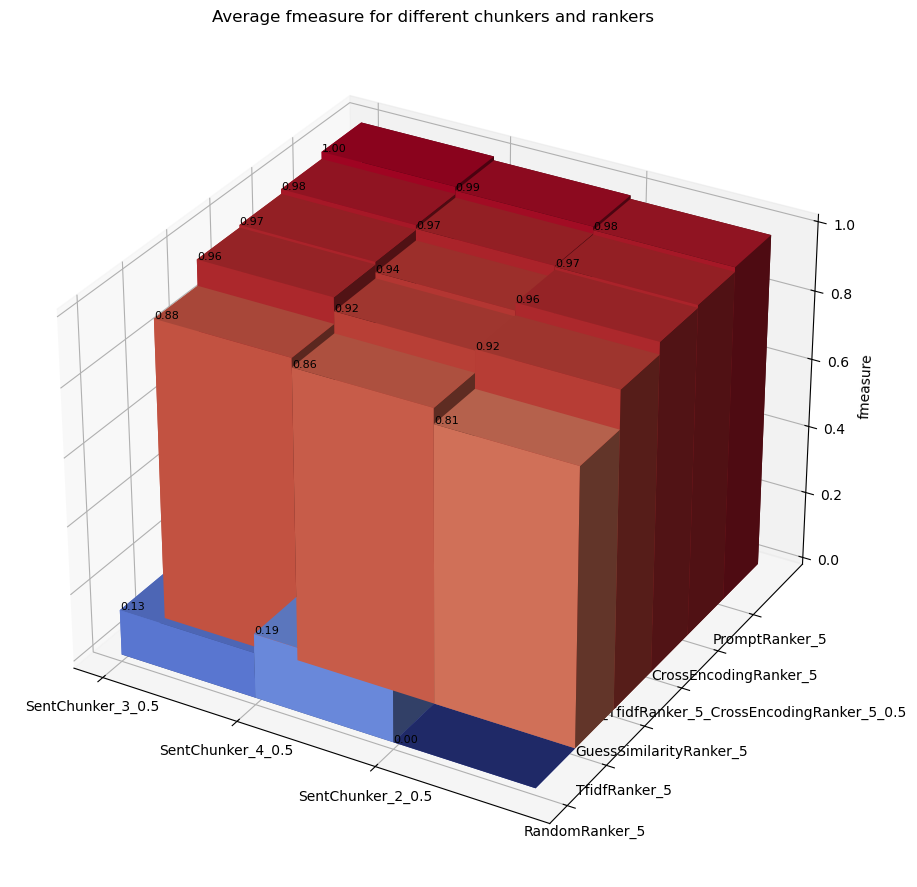

In [10]:
get_plot_df(df, 'chunker', 'ranker', 'fmeasure')

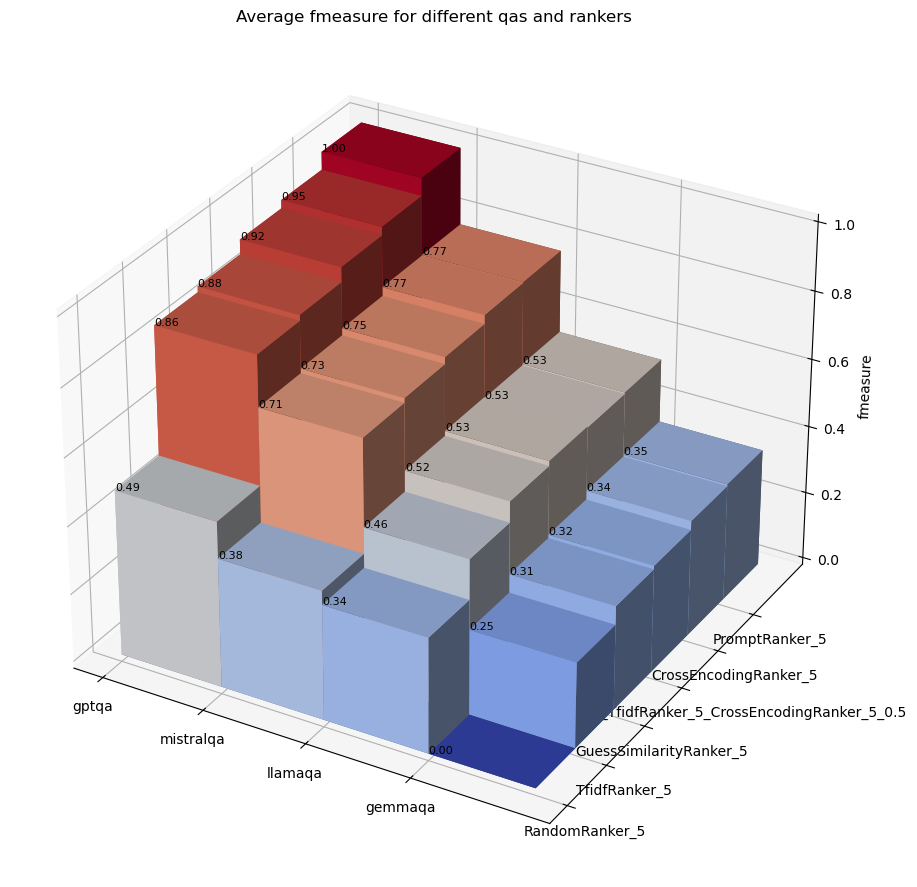

In [11]:
get_plot_df(df[df['document'] == 'qasper'], 'qa', 'ranker', 'fmeasure')

In [12]:
# df but only where dataset is qasper
df_qasper = df[df['document'] == 'qasper']
# num of unique document_ids
# df_qasper['document_id'].unique().shape
# num of unique questions
df_qasper['question'].unique().shape

(520,)